In [1]:
# import bibliotek
import os
from pathlib import Path
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

In [2]:
# Pobieramy dane z wybranej rywalizacji
container_check = os.getenv("iscontainer")
if container_check=="y":
    config_dir = Path("/home/vscode/.config/kaggle")
    config_dir.mkdir(parents=True, exist_ok=True)
    with open(config_dir / "kaggle.json", "w") as dst:
        with open("./kaggle.json", "r") as src:
            dst.write(src.read())


In [3]:
# test czy Kaggle działa
api = KaggleApi()
api.authenticate()

# Poprawny sposób: bez limitu w funkcji
competitions = api.competitions_list()

# Wyświetlamy tylko 5 pierwszych ręcznie
for competition in competitions[:5]:
    print(competition.ref)


https://www.kaggle.com/competitions/arc-prize-2025
https://www.kaggle.com/competitions/stanford-rna-3d-folding
https://www.kaggle.com/competitions/byu-locating-bacterial-flagellar-motors-2025
https://www.kaggle.com/competitions/birdclef-2025
https://www.kaggle.com/competitions/drawing-with-llms


In [4]:
# Zmiana po dodania nowych plików w kaggle - pobieranie katalogów,

# Autoryzacja
api = KaggleApi()
api.authenticate()

# Dataset i folder docelowy
dataset = "kamilpytlak/personal-key-indicators-of-heart-disease"
download_folder = Path("../data")
download_folder.mkdir(parents=True, exist_ok=True)

# Pobranie CAŁEGO datasetu i automatyczne rozpakowanie
api.dataset_download_files(dataset, path=str(download_folder), unzip=True)

print("Dane zostały pobrane i rozpakowane.")

# Ścieżki bazowe
base_path = Path("../data")
source_file = base_path / "2020" / "heart_2020_cleaned.csv"
destination_file = base_path / "heart_2020_cleaned.csv"

# Skopiowanie pliku z katalogu '2020' do głównego katalogu 'data'
if source_file.exists():
    shutil.copy(source_file, destination_file)
    print("Plik został skopiowany do katalogu głównego.")
else:
    print("Plik źródłowy nie istnieje:", source_file)

# Usunięcie katalogu '2020'
dir_2020 = base_path / "2020"
if dir_2020.exists() and dir_2020.is_dir():
    shutil.rmtree(dir_2020)
    print("Usunięto katalog '2020'.")
else:
    print("ℹKatalog '2020' nie istnieje.")

# Usunięcie katalogu '2022'
dir_2022 = base_path / "2022"
if dir_2022.exists() and dir_2022.is_dir():
    shutil.rmtree(dir_2022)
    print("Usunięto katalog '2022'.")
else:
    print("ℹKatalog '2022' nie istnieje.")

Dataset URL: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
Dane zostały pobrane i rozpakowane.
Plik został skopiowany do katalogu głównego.
Usunięto katalog '2020'.
Usunięto katalog '2022'.


In [5]:
!dir "../data"

heart_2020_cleaned.csv


In [6]:
#  Wczytanie danych
path = "../data/heart_2020_cleaned.csv"
df = pd.read_csv(path)

In [7]:
# Sprawdzenie danych w zakresie ilości "zawałów" serca
df["HeartDisease"].value_counts()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

In [8]:
# Wyświetlwnie pierwszych 5 wierszy
print("Pierwsze 5 wierszy danych:")
print(df.head())

Pierwsze 5 wierszy danych:
  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes         

In [9]:
# Informacje o zbiorze danych
print("Informacje o zbiorze danych:")
print(df.info())

Informacje o zbiorze danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  obje

In [10]:
# Statystyki opisowe

print("\n\u2794 Statystyki opisowe:")
print(df.describe())


➔ Statystyki opisowe:
                 BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000


In [11]:
# Sprawdzenie brakujących danych
print("Sprawdzenie brakujących danych:")
print(df.isnull().sum())

Sprawdzenie brakujących danych:
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


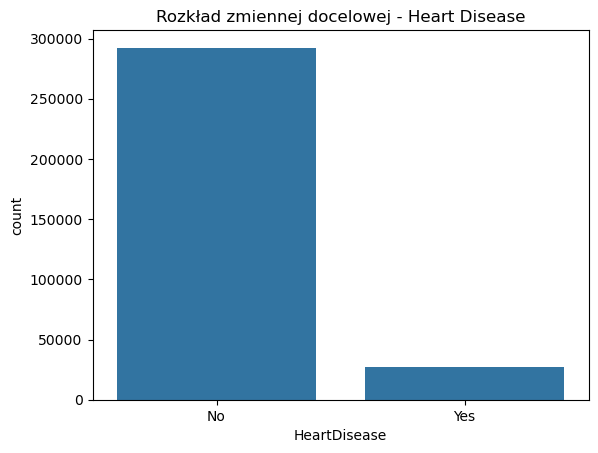

In [12]:
# Rozkład zmiennych
# Wykres rozkładu dla zmiennej docelowej (target)
os.makedirs("../eksploracja", exist_ok=True)
sns.countplot(data=df, x="HeartDisease")
plt.title("Rozkład zmiennej docelowej - Heart Disease")
#plt.savefig("../eksploracja/Rozklad_zmiennej_docelowej.png", dpi=300, bbox_inches='tight')
plt.savefig("../eksploracja/Rozklad_zmiennej_docelowej.png")
plt.show()


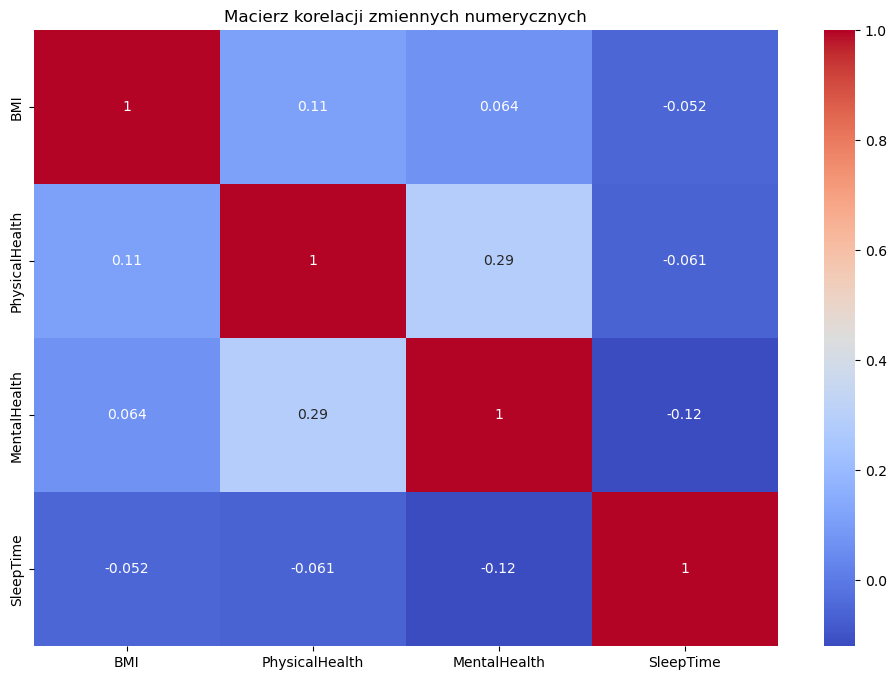

In [13]:
# Macierz korelacji dla zmiennych numerycznych
os.makedirs("../eksploracja", exist_ok=True)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Macierz korelacji zmiennych numerycznych")
plt.savefig("../eksploracja/Macierz_korelacji.png")
plt.show()

In [14]:
# Lista unikalnych wartości dla zmiennych kategorycznych
print("Unikalne wartości w zmiennych kategorycznych:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

Unikalne wartości w zmiennych kategorycznych:
HeartDisease: ['No' 'Yes']
Smoking: ['Yes' 'No']
AlcoholDrinking: ['No' 'Yes']
Stroke: ['No' 'Yes']
DiffWalking: ['No' 'Yes']
Sex: ['Female' 'Male']
AgeCategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity: ['Yes' 'No']
GenHealth: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma: ['Yes' 'No']
KidneyDisease: ['No' 'Yes']
SkinCancer: ['Yes' 'No']


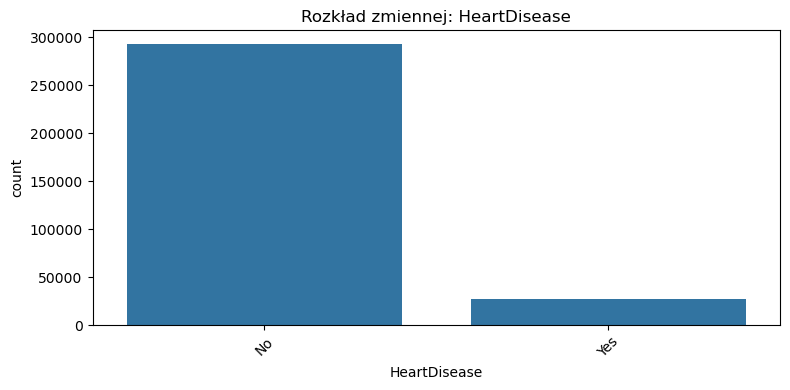

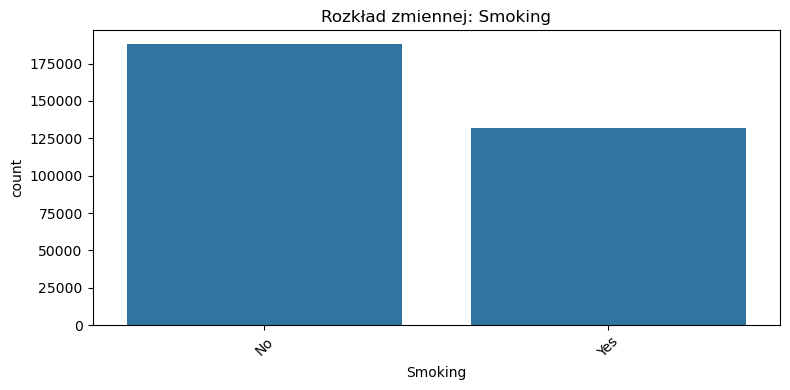

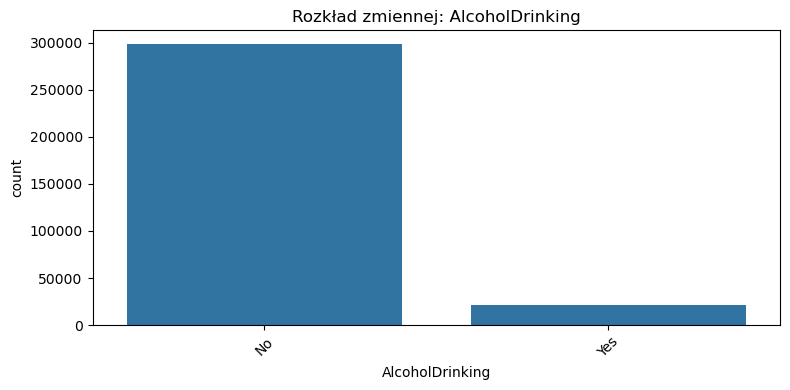

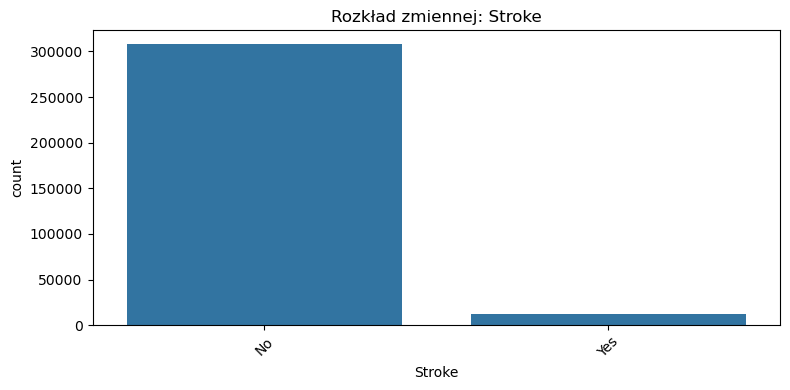

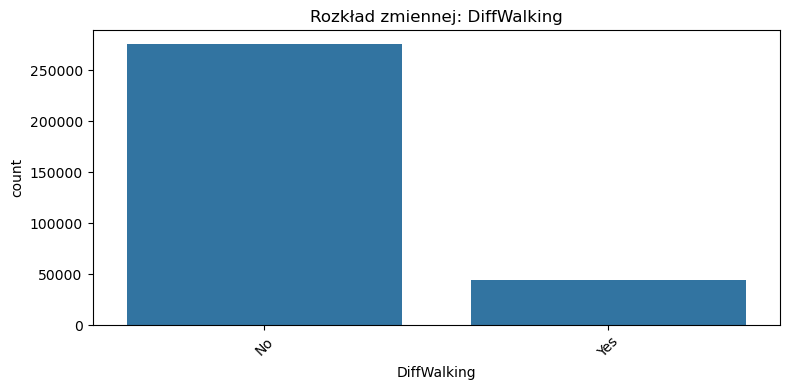

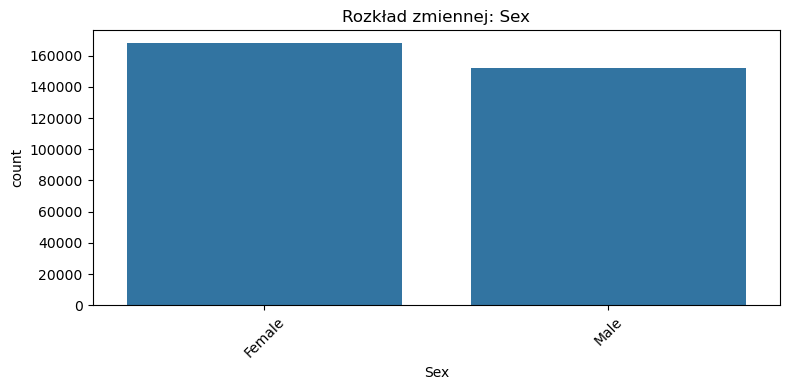

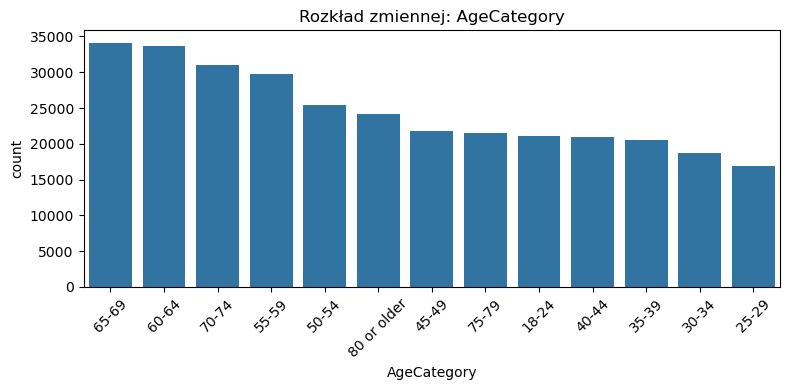

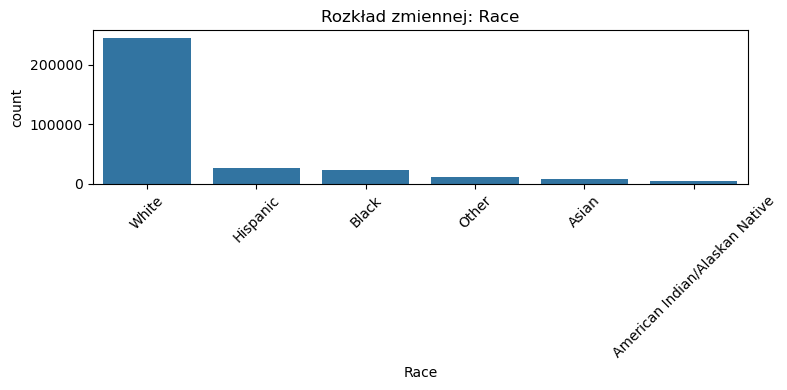

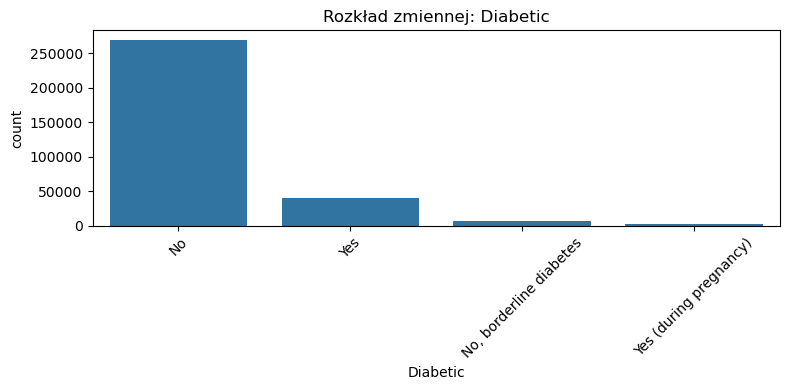

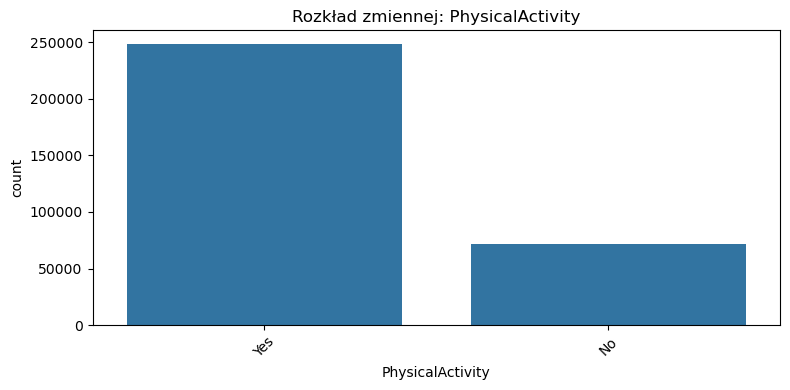

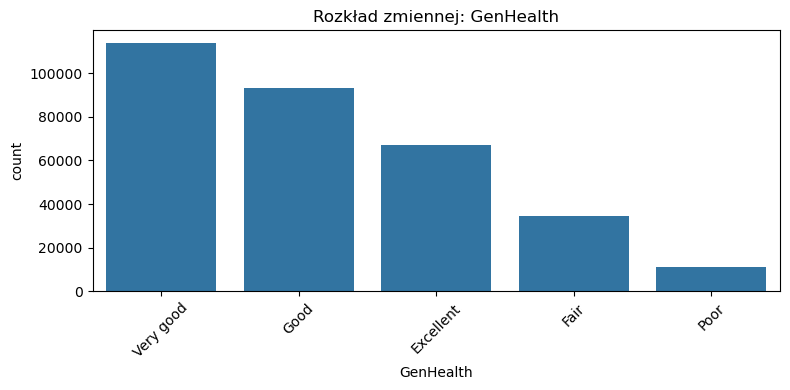

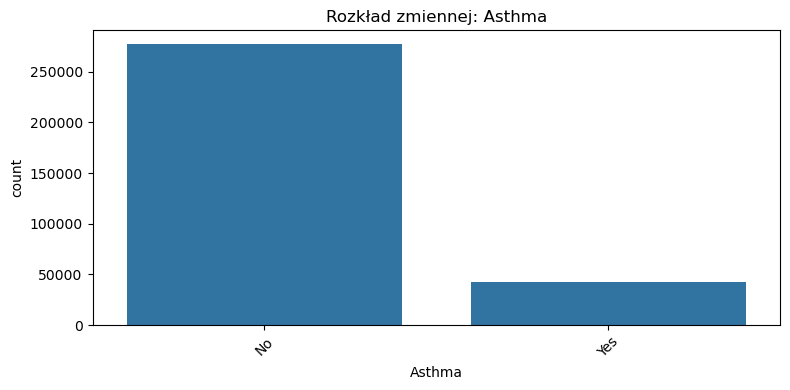

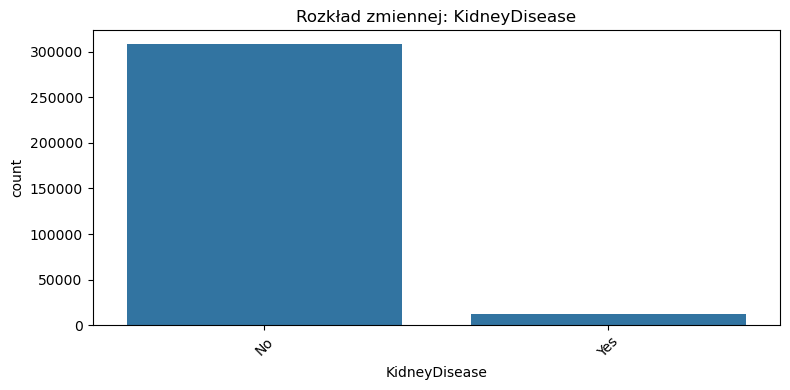

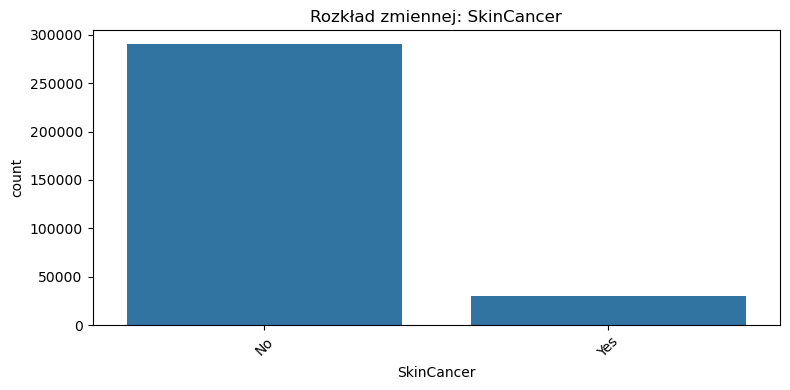

In [15]:
# Wykresy słupkowe dla zmiennych kategorycznych

os.makedirs("../eksploracja", exist_ok=True)
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Rozkład zmiennej: {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"../eksploracja/{col}.png")
    plt.show()

In [16]:
# Tabele kontyngencji względem HeartDisease
for col in categorical_cols:
    print(f"\nTabela krzyżowa: {col} vs HeartDisease")
    print(pd.crosstab(df[col], df["HeartDisease"], normalize='index') * 100)


Tabela krzyżowa: HeartDisease vs HeartDisease
HeartDisease     No    Yes
HeartDisease              
No            100.0    0.0
Yes             0.0  100.0

Tabela krzyżowa: Smoking vs HeartDisease
HeartDisease         No        Yes
Smoking                           
No            93.966586   6.033414
Yes           87.842284  12.157716

Tabela krzyżowa: AlcoholDrinking vs HeartDisease
HeartDisease            No       Yes
AlcoholDrinking                     
No               91.197847  8.802153
Yes              94.760527  5.239473

Tabela krzyżowa: Stroke vs HeartDisease
HeartDisease         No        Yes
Stroke                            
No            92.531018   7.468982
Yes           63.634104  36.365896

Tabela krzyżowa: DiffWalking vs HeartDisease
HeartDisease         No        Yes
DiffWalking                       
No            93.701545   6.298455
Yes           77.419500  22.580500

Tabela krzyżowa: Sex vs HeartDisease
HeartDisease         No        Yes
Sex                      

In [17]:
# Wczytanie danych
#df = pd.read_csv("ścieżka/do/heart_2020_cleaned.csv")  # <-- podmień na własną ścieżkę, np. "../data/heart_2020_cleaned.csv"

# Statystyki opisowe dla danych liczbowych
print("Statystyki opisowe danych liczbowych:")
print(df.describe())

# Statystyki opisowe dla danych kategorycznych
print("\nStatystyki opisowe danych kategorycznych:")
print(df.describe(include=["object"]))

Statystyki opisowe danych liczbowych:
                 BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

Statystyki opisowe danych kategorycznych:
       HeartDisease Smoking AlcoholDrinking  Stroke DiffWalking     Sex  \
count        319795  319795          319795  319795      319795  319795   
unique            2       2               2       2           2       2   
top              No      No              No      No          No  Female   
freq         292

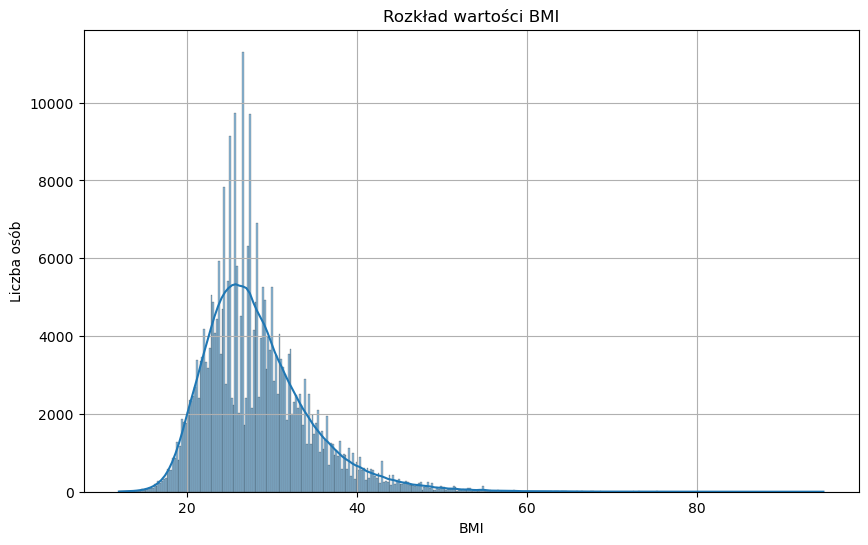

In [18]:
# Wizualizacja: Rozkład wartości BMI
os.makedirs("../eksploracja", exist_ok=True)
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], kde=True)
plt.title('Rozkład wartości BMI')
plt.xlabel('BMI')
plt.ylabel('Liczba osób')
plt.grid(True)
plt.savefig("../eksploracja/Rozkład_wartości_BMI.png")
plt.show()

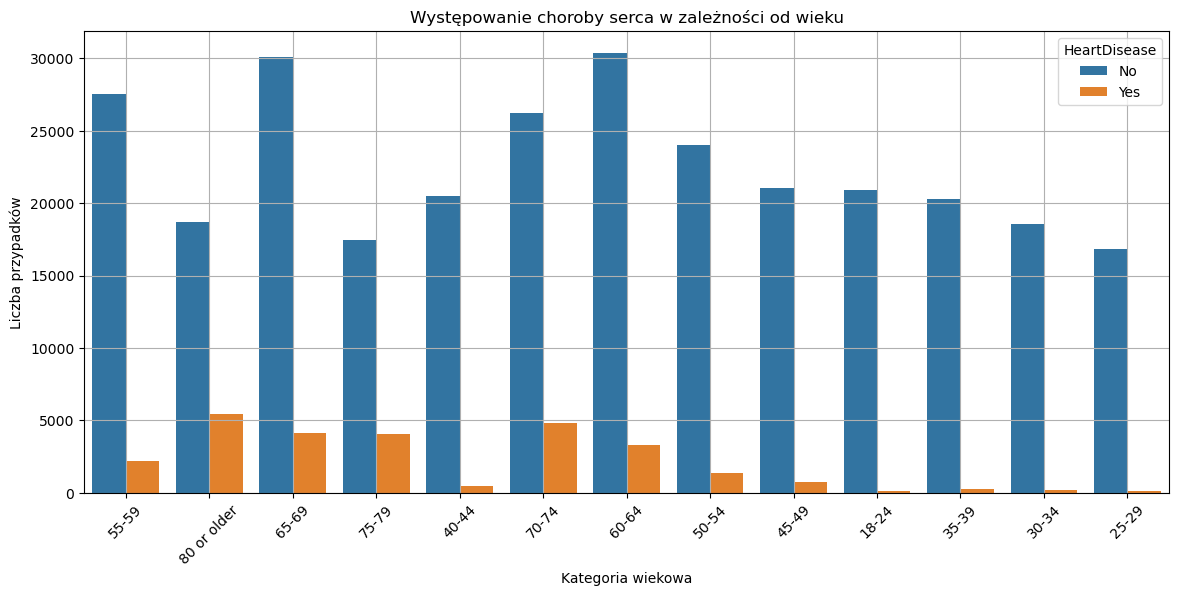

In [19]:
# Wizualizacja: Choroba serca względem kategorii wiekowej

os.makedirs("../eksploracja", exist_ok=True)
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='AgeCategory', hue='HeartDisease')
plt.title('Występowanie choroby serca w zależności od wieku')
plt.xlabel('Kategoria wiekowa')
plt.ylabel('Liczba przypadków')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig("../eksploracja/Występowanie_choroby_serca_w_zależności_od_wieku.png")  
plt.show()

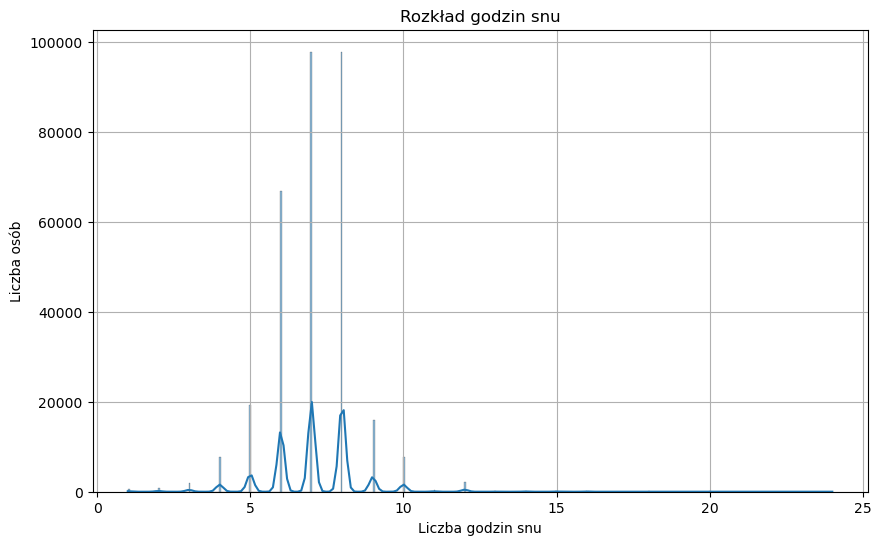

In [20]:
# Spanie
os.makedirs("../eksploracja", exist_ok=True)
plt.figure(figsize=(10, 6))
sns.histplot(df['SleepTime'], kde=True)
plt.title('Rozkład godzin snu')
plt.xlabel('Liczba godzin snu')
plt.ylabel('Liczba osób')
plt.grid(True)
plt.savefig("../eksploracja/Rozkład_godzin_snu.png")    
plt.show()

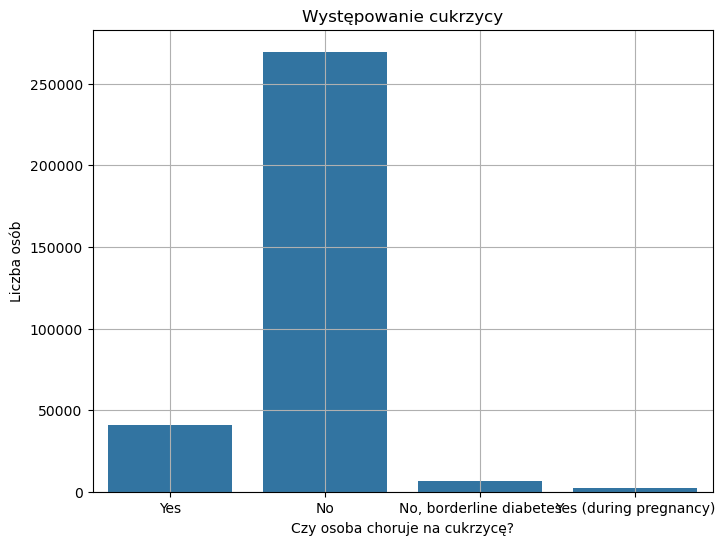

In [21]:
# Cukrzyca
os.makedirs("../eksploracja", exist_ok=True)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Diabetic')
plt.title('Występowanie cukrzycy')
plt.xlabel('Czy osoba choruje na cukrzycę?')
plt.ylabel('Liczba osób')
plt.grid(True)
plt.savefig("../eksploracja/Występowanie_cukrzycy.png")
plt.show()

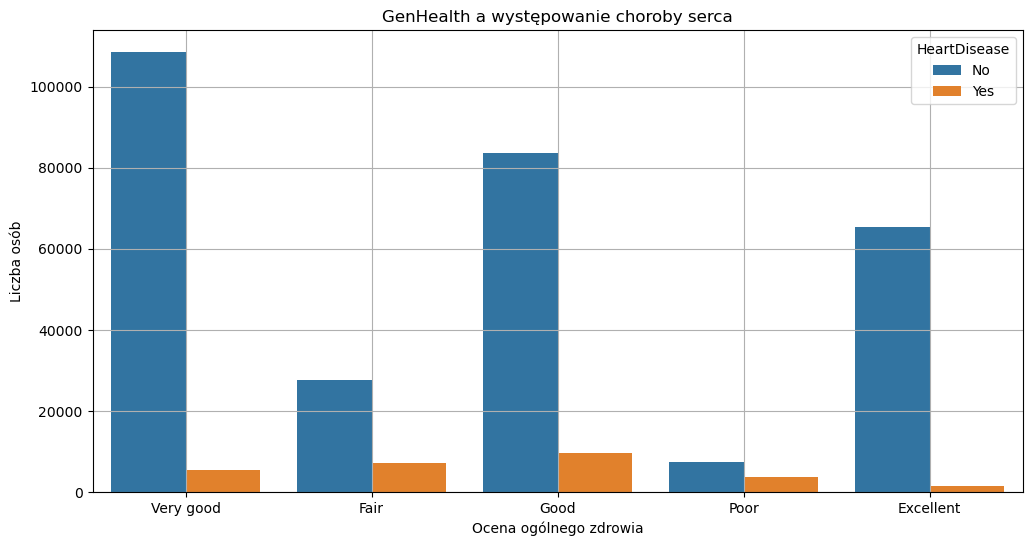

In [22]:
# Wizualizacja: Zdrowie ogólne vs choroby serca
os.makedirs("../eksploracja", exist_ok=True)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='GenHealth', hue='HeartDisease')
plt.title('GenHealth a występowanie choroby serca')
plt.xlabel('Ocena ogólnego zdrowia')
plt.ylabel('Liczba osób')
plt.grid(True)
plt.savefig("../eksploracja/GenHealth_a_występowanie_choroby_serca.png")
plt.show()

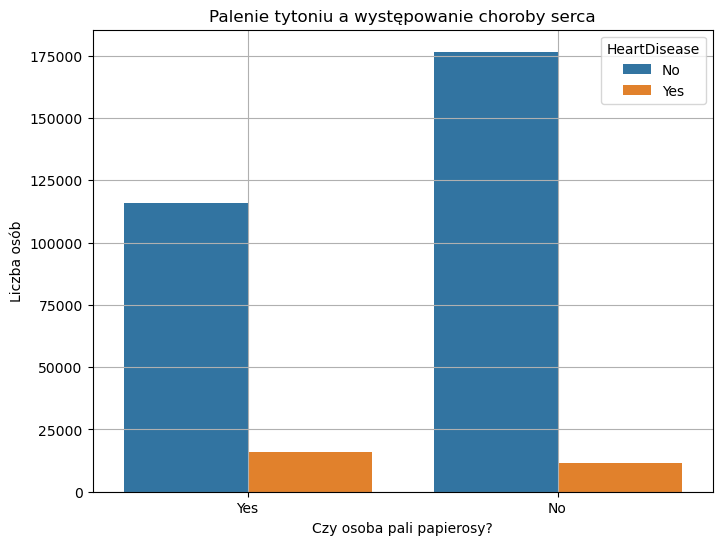

In [23]:
# Wizualizacja: Palenie względem chorób serca
os.makedirs("../eksploracja", exist_ok=True)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Smoking', hue='HeartDisease')
plt.title('Palenie tytoniu a występowanie choroby serca')
plt.xlabel('Czy osoba pali papierosy?')
plt.ylabel('Liczba osób')
plt.grid(True)
plt.savefig("../eksploracja/Palenie_tytoniu_a_występowanie_choroby_serca.png")
plt.show()

In [24]:
# Podsumowanie
print("Eksploracja danych zakończona.")

Eksploracja danych zakończona.
